# Overview 

Student performance is always a primary issue when it comes to education. Parents, teachers, administration, community leaders are always concerned about how well students perform. Much of our tax dollars goes into funding education and everything that it involves. So what are the primary drivers that determine student success? This project aims to get an idea of what those drivers to success are and what can be done to improve student performance. The data set that we are working with is simulated data that depicts student standardized tests scores in a ficticious public school. This data includes common metrics that are looked at by education professionals, albeit, given the simulated nature of this data, it is a bit limited in scope. None the less we are able to get a good idea of what this data is telling us with respect how students perform and why.


## The Data

This data comes from a graduate student at BYU named Royce Kimmons who specializes in the relationship between technology and education.
The link to his website can be found here. http://roycekimmons.com/


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

stu_data = pd.read_csv('combined_csv.csv')
stu_data['composite score'] = ((stu_data['math score'] + stu_data['reading score'] + stu_data['writing score'])/3).round()
stu_data['composite score'] = stu_data['composite score'].astype(int)
stu_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,composite score
0,male,group B,some college,free/reduced,completed,65,62,61,63
1,male,group D,bachelor's degree,standard,none,61,59,54,58
2,male,group A,some high school,standard,none,57,50,50,52
3,male,group C,bachelor's degree,free/reduced,none,63,64,56,61
4,female,group B,associate's degree,free/reduced,completed,57,87,82,75


In [2]:
math_all = stu_data['math score'].mean()
reading_all = stu_data['reading score'].mean()
writing_all = stu_data['writing score'].mean()
comp_all = stu_data['composite score'].mean()

all_mean = pd.DataFrame({'Math Mean All':[math_all], 'Reading Mean All':[reading_all], 'Writing Mean All':[writing_all], 'Composite Mean All':[comp_all]})
all_mean

,Math Mean All,Reading Mean All,Writing Mean All,Composite Mean All
0,66.6088,69.7898,68.6714,68.3594


### Overall Test Averages
- Gender
- Ethnicity
- Parent Level of Education
- Free Lunch
- Whether or not a test prep course was taken

These were some pretty expected observations that fit into societal stereotyes. The boys overall scored better on average in math. Girls scored better in reading and writing. This data shows a racially based achievement gap between what appear to be the higher achieving groups, those being Groups D and E and the lower achieving groups A and B. When it comes to parental level of education, the scores basically corespond with the parents level of ed -- the higher the parent's achievement the higher the kid's scores tended to be. The most intersting takaway here is that the students who have parents that have completed a degree score pretty significantly higher. Free/reduced lunch recipients seemed to show a sizeable gab with about an 11% different between their paid lunch classmates. This is a metric that indicates poverty, poverty is definitely an indicator. The test prep course overall appears to help quite a bit as well. 

In [3]:
gender_overall = stu_data.groupby('gender').mean()
gender_overall

,math score,reading score,writing score,composite score
gender,,,,
female,63.967793,72.950903,72.804006,69.909269
male,69.348818,66.510187,64.383863,66.751426


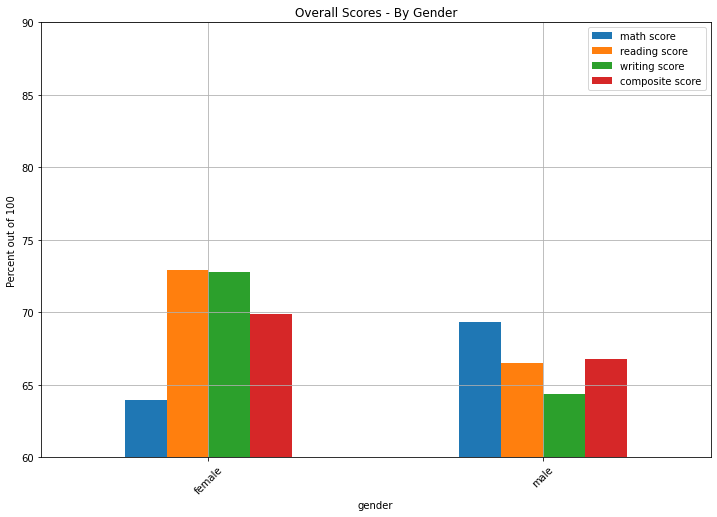

In [4]:
ax = gender_overall.plot(kind='bar', figsize=(12,8))
ax.set_alpha(0.8)
ax.set_ylim(60, 90)
ax.set_title("Overall Scores - By Gender")
ax.set_ylabel('Percent out of 100')
plt.xticks(rotation=45)
plt.grid()
plt.savefig('images/over_score_gender.png')
plt.show()

In [5]:
eth_overall = stu_data.groupby('race/ethnicity').mean().round(decimals=2)
eth_overall

,math score,reading score,writing score,composite score
race/ethnicity,,,,
group A,63.74,67.83,65.94,65.83
group B,63.51,67.22,65.48,65.42
group C,64.57,69.04,67.59,67.07
group D,68.06,71.02,71.37,70.15
group E,75.07,74.29,72.52,73.96


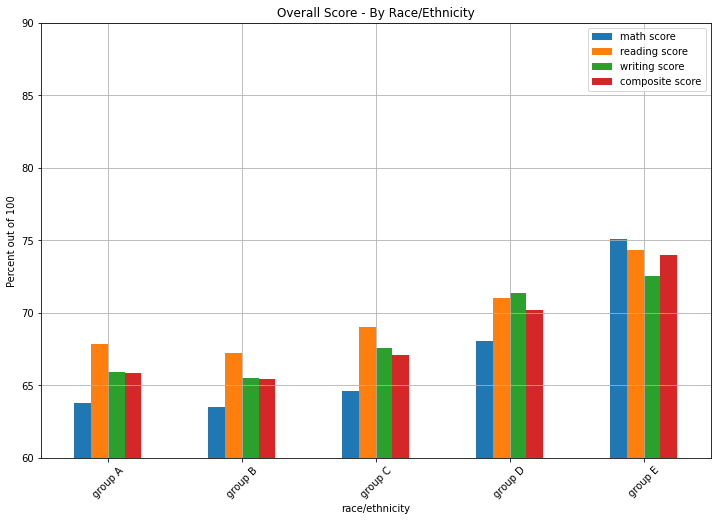

In [6]:
ax = eth_overall.plot(kind='bar', figsize=(12,8))
ax.set_alpha(0.8)
ax.set_ylim(60, 90)
ax.set_title("Overall Score - By Race/Ethnicity")
ax.set_ylabel('Percent out of 100')
plt.xticks(rotation=45)
plt.grid()
plt.savefig('images/over_score_race_eth.png')
plt.show()

In [7]:
ed_overall = stu_data.groupby('parental level of education').mean().round(decimals=2)
ed_overall

,math score,reading score,writing score,composite score
parental level of education,,,,
associate's degree,68.94,71.92,70.99,70.62
bachelor's degree,69.43,72.70,72.71,71.61
high school,64.44,67.63,65.59,65.90
master's degree,71.92,75.69,75.88,74.50
some college,66.52,69.71,68.96,68.40
some high school,62.91,66.02,64.05,64.32


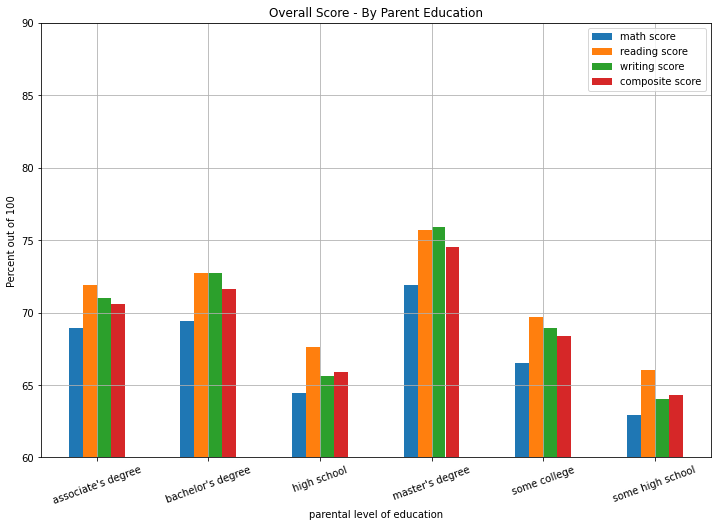

In [48]:
ax = ed_overall.plot(kind='bar', figsize=(12,8))
ax.set_alpha(0.8)
ax.set_ylim(60, 90)
ax.set_title("Overall Score - By Parent Education")
ax.set_ylabel('Percent out of 100')
plt.xticks(rotation=20)
plt.grid()
plt.savefig('images/overall_score_par_ed.png')
plt.show()

In [9]:
lunch_mean = stu_data.groupby('lunch').mean().round(decimals=2)
lunch_mean

,math score,reading score,writing score,composite score
lunch,,,,
free/reduced,58.95,64.81,63.06,62.28
standard,70.76,72.49,71.71,71.66


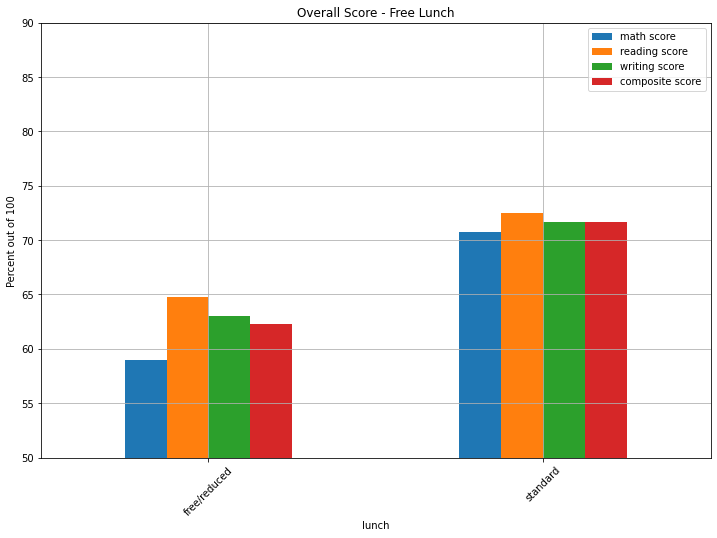

In [10]:
ax = lunch_mean.plot(kind='bar', figsize=(12,8))
ax.set_alpha(0.8)
ax.set_ylim(50, 90)
ax.set_title("Overall Score - Free Lunch")
ax.set_ylabel('Percent out of 100')
plt.xticks(rotation=45)
plt.grid()
plt.savefig('images/overall_score_lunch.png')
plt.show()

In [49]:
test_prep_mean = stu_data.groupby('test preparation course').mean().round(decimals=2)
test_prep_mean

,math score,reading score,writing score,composite score
test preparation course,,,,
completed,70.25,74.44,75.22,73.31
none,64.57,67.19,65.00,65.59


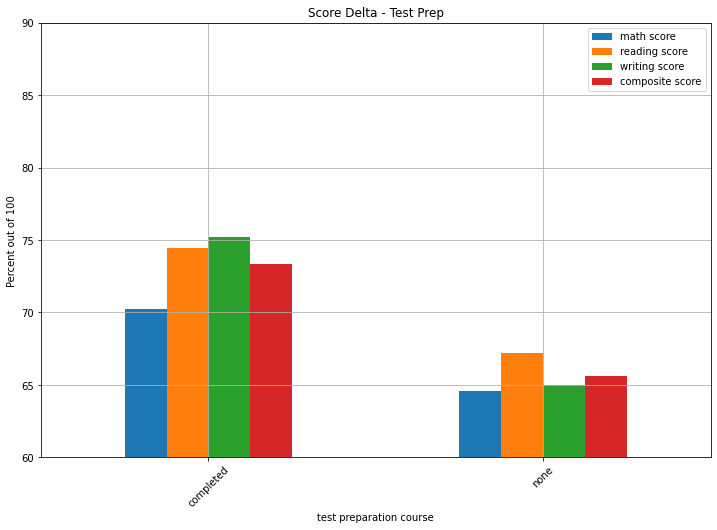

In [12]:
ax = test_prep_mean.plot(kind='bar', figsize=(12,8))
ax.set_alpha(0.8)
ax.set_ylim(60, 90)
ax.set_title("Score Delta - Test Prep")
ax.set_ylabel('Percent out of 100')
plt.xticks(rotation=45)
plt.grid()
plt.savefig('images/overall_score_test_prep.png')
plt.show()

Already we can see an achievement gap between group E and groups A and B. Also there is an education based achievement gap that is particularly large between children with parents that have not finished high school and children with parents that hold an advanced degree. Below are some charts that reflect these findings.The bar graph also clearly shows an economic achievement gap in the lunch chart.


### Data By Gender

This series of graphs breaks down the mean test scores by gender vs ethnicity, parent's education, and whether or not the child is getting free lunch. While this series a graphs follows the same trajectory as those prior, two trends become apparent. That is, exactly how much math scores struggle for girls from more disadvantaged demographics. The same can be said for boys and writing. The more disadvantaged the demographic, the worse the mean score is particularly for children of the least educated parents.

In [13]:
# gen = stu_data.groupby(['race/ethnicity', 'parental level of education', 'gender']).mean().round(decimals=2)
# gen

In [14]:
# ax = gen.plot(kind='bar', figsize=(12,10))
# ax.set_alpha(0.8)
# ax.set_ylim(0, 120)
# ax.set_title("Score Delta - Test Prep")
# ax.set_ylabel('Percent out of 100')
# plt.xticks(rotation=45)
# plt.grid()
# plt.show()

In [15]:
# gen_count = stu_data.groupby(['race/ethnicity', 'parental level of education', 'gender']).count()
# counts = gen_count['lunch']
# counts


In [16]:
boys = stu_data.loc[stu_data['gender'] == 'male']
girls = stu_data.loc[stu_data['gender'] == 'female']

std_lunch = stu_data.loc[stu_data['lunch'] == 'standard']
rdc_lunch = stu_data.loc[stu_data['lunch'] == 'free/reduced']

prep_yes = stu_data.loc[stu_data['test preparation course'] == 'completed']
prep_no = stu_data.loc[stu_data['test preparation course'] == 'none']

group_a = stu_data.loc[stu_data['race/ethnicity'] == 'group A']
group_b = stu_data.loc[stu_data['race/ethnicity'] == 'group B']
group_c = stu_data.loc[stu_data['race/ethnicity'] == 'group C']
group_d = stu_data.loc[stu_data['race/ethnicity'] == 'group D']
group_e = stu_data.loc[stu_data['race/ethnicity'] == 'group E']

p_shs = stu_data.loc[stu_data['parental level of education'] == 'some high school']
p_hs = stu_data.loc[stu_data['parental level of education'] == 'high school']
p_sc = stu_data.loc[stu_data['parental level of education'] == 'some college']
p_a = stu_data.loc[stu_data['parental level of education'] == "associate's degree"]
p_b = stu_data.loc[stu_data['parental level of education'] == "bachelor's degree"]
p_m = stu_data.loc[stu_data['parental level of education'] == "master's degree"]

In [17]:
boys_race = boys.groupby('race/ethnicity').mean().copy()
boys_race = boys_race.rename(columns={'math score':'Boys Math Mean', 'reading score':'Boys Reading Mean','writing score':'Boys Writing Mean','composite score':'Boys Composite'})

girls_race = girls.groupby('race/ethnicity').mean().copy()
girls_race = girls_race.rename(columns={'math score':'Girls Math Mean', 'reading score':'Girls Reading Mean', 'writing score':'Girls Writing Mean', 'composite score':'Girls Composite'})

gender_race_both = pd.merge(boys_race, girls_race, how="right", on=["race/ethnicity"])
gender_race_both = gender_race_both[["Boys Math Mean","Girls Math Mean", "Boys Reading Mean", "Girls Reading Mean", "Boys Writing Mean", "Girls Writing Mean", "Boys Composite", "Girls Composite"]]
gender_race_both = gender_race_both.round(decimals=2)
gender_race_both

,Boys Math Mean,Girls Math Mean,Boys Reading Mean,Girls Reading Mean,Boys Writing Mean,Girls Writing Mean,Boys Composite,Girls Composite
race/ethnicity,,,,,,,,
group A,66.30,61.17,64.19,71.49,61.41,70.50,63.96,67.71
group B,65.67,61.27,63.71,70.88,60.83,70.32,63.42,67.51
group C,67.76,61.78,65.71,71.95,63.39,71.26,65.63,68.33
group D,70.88,65.30,68.15,73.83,67.47,75.18,68.84,71.43
group E,77.44,72.67,70.87,77.77,67.96,77.17,72.08,75.86


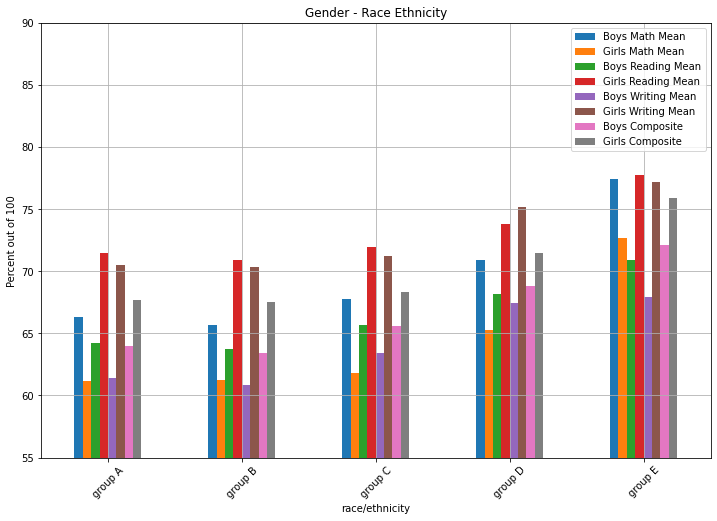

In [18]:
ax = gender_race_both.plot(kind='bar', figsize=(12,8))
ax.set_alpha(0.8)
ax.set_ylim(55, 90)
ax.set_title("Gender - Race Ethnicity")
ax.set_ylabel('Percent out of 100')
plt.xticks(rotation=45)
plt.grid()
plt.savefig('images/gender_race_eth.png')
plt.show()

In [19]:
boys_loe = boys.groupby('parental level of education').mean()
boys_loe = boys_loe.rename(columns={'math score':'Boys Math Mean', 'reading score':'Boys Reading Mean','writing score':'Boys Writing Mean','composite score':'Boys Composite'})

girls_loe = girls.groupby('parental level of education').mean()
girls_loe= girls_loe.rename(columns={'math score':'Girls Math Mean', 'reading score':'Girls Reading Mean', 'writing score':'Girls Writing Mean', 'composite score':'Girls Composite'})

gender_loe_both = pd.merge(boys_loe, girls_loe, how="right", on=["parental level of education"])
gender_loe_both = gender_loe_both[["Boys Math Mean","Girls Math Mean", "Boys Reading Mean", "Girls Reading Mean", "Boys Writing Mean", "Girls Writing Mean", "Boys Composite", "Girls Composite"]]
gender_loe_both = gender_loe_both.round(decimals=2)
gender_loe_both

,Boys Math Mean,Girls Math Mean,Boys Reading Mean,Girls Reading Mean,Boys Writing Mean,Girls Writing Mean,Boys Composite,Girls Composite
parental level of education,,,,,,,,
associate's degree,71.58,66.31,68.70,75.15,66.67,75.30,68.98,72.26
bachelor's degree,72.34,66.51,69.58,75.82,68.78,76.63,70.25,72.98
high school,67.35,61.62,64.52,70.66,61.48,69.59,64.47,67.28
master's degree,74.98,69.14,71.96,79.08,71.71,79.68,72.88,75.97
some college,68.96,64.29,66.01,73.11,64.22,73.31,66.39,70.24
some high school,65.73,60.17,63.07,68.90,59.89,68.10,62.88,65.72


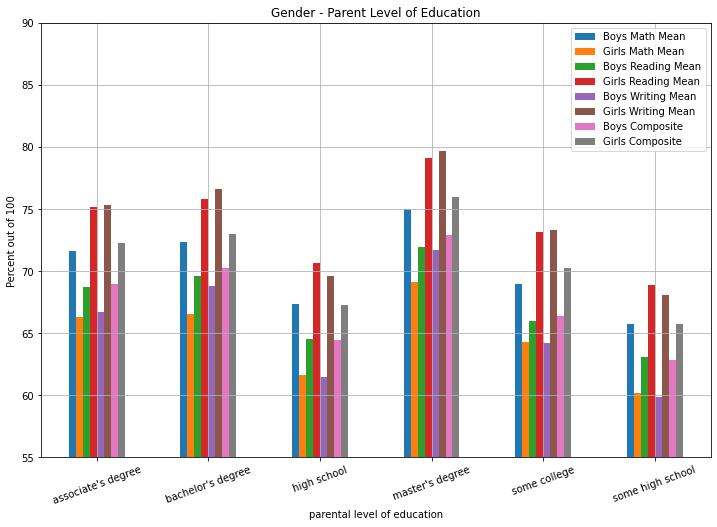

In [50]:
ax = gender_loe_both.plot(kind='bar', figsize=(12,8))
ax.set_alpha(0.8)
ax.set_ylim(55, 90)
ax.set_title("Gender - Parent Level of Education")
ax.set_ylabel('Percent out of 100')
plt.xticks(rotation=20)
plt.grid()
plt.savefig('images/gender_par_ed.png')
plt.show()

In [21]:
boys_lunch = boys.groupby('lunch').mean()
boys_lunch = boys_lunch.rename(columns={'math score':'Boys Math Mean', 'reading score':'Boys Reading Mean','writing score':'Boys Writing Mean','composite score':'Boys Composite'})

girls_lunch = girls.groupby('lunch').mean()
girls_lunch = girls_lunch.rename(columns={'math score':'Girls Math Mean', 'reading score':'Girls Reading Mean', 'writing score':'Girls Writing Mean', 'composite score':'Girls Composite'})

gender_lunch_both = pd.merge(boys_lunch, girls_lunch, how="right", on=['lunch'])
gender_lunch_both = gender_lunch_both[["Boys Math Mean","Girls Math Mean", "Boys Reading Mean", "Girls Reading Mean", "Boys Writing Mean", "Girls Writing Mean", "Boys Composite", "Girls Composite"]]
gender_lunch_both = gender_lunch_both.round(decimals=2)
gender_lunch_both

,Boys Math Mean,Girls Math Mean,Boys Reading Mean,Girls Reading Mean,Boys Writing Mean,Girls Writing Mean,Boys Composite,Girls Composite
lunch,,,,,,,,
free/reduced,62.31,55.82,62.06,67.37,59.35,66.52,61.25,63.24
standard,73.06,68.50,68.86,76.05,67.04,76.30,69.66,73.62


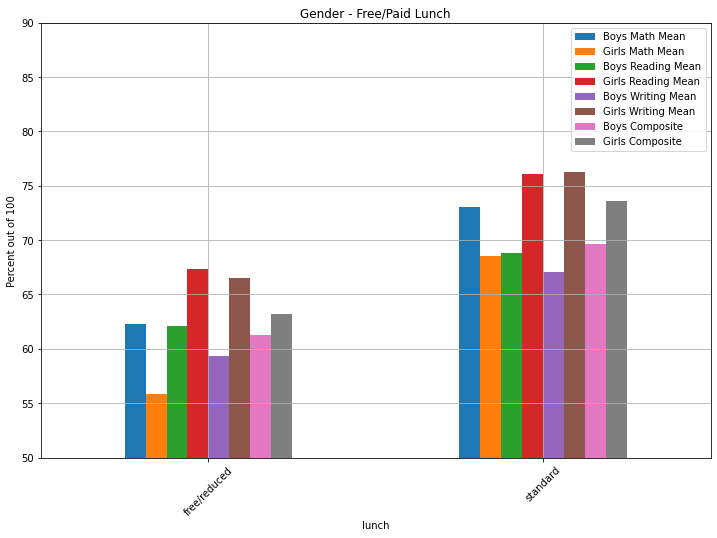

In [22]:
ax = gender_lunch_both.plot(kind='bar', figsize=(12,8))
ax.set_alpha(0.8)
ax.set_ylim(50, 90)
ax.set_title("Gender - Free/Paid Lunch")
ax.set_ylabel('Percent out of 100')
plt.xticks(rotation=45)
plt.grid()
plt.savefig('images/gender_lunch.png')
plt.show()

In [23]:
boys_test = boys.groupby('test preparation course').mean()
girls_test = girls.groupby('test preparation course').mean()

boys_test = boys_test.rename(columns={'math score':'Boys Math Mean', 'reading score':'Boys Reading Mean','writing score':'Boys Writing Mean','composite score':'Boys Composite'})
girls_test = girls_test.rename(columns={'math score':'Girls Math Mean', 'reading score':'Girls Reading Mean', 'writing score':'Girls Writing Mean', 'composite score':'Girls Composite'})

gender_test_both = pd.merge(boys_test, girls_test, how="right", on=['test preparation course'])
gender_test_both = gender_test_both[["Boys Math Mean","Girls Math Mean", "Boys Reading Mean", "Girls Reading Mean", "Boys Writing Mean", "Girls Writing Mean", "Boys Composite", "Girls Composite"]]
gender_test_both = gender_test_both.round(decimals=2)
gender_test_both

,Boys Math Mean,Girls Math Mean,Boys Reading Mean,Girls Reading Mean,Boys Writing Mean,Girls Writing Mean,Boys Composite,Girls Composite
test preparation course,,,,,,,,
completed,72.98,67.57,71.15,77.68,70.94,79.44,71.70,74.90
none,67.28,61.98,63.86,70.35,60.65,69.15,63.93,67.16


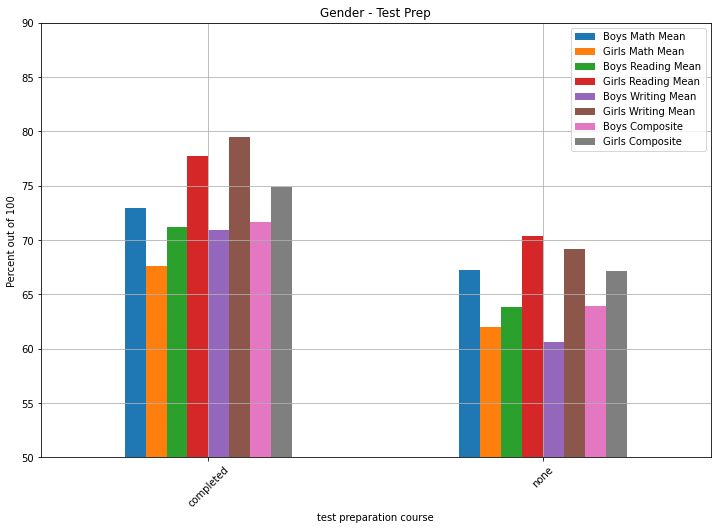

In [24]:
ax = gender_test_both.plot(kind='bar', figsize=(12,8))
ax.set_alpha(0.8)
ax.set_ylim(50, 90)
ax.set_title("Gender - Test Prep")
ax.set_ylabel('Percent out of 100')
plt.xticks(rotation=45)
plt.grid()
plt.savefig('images/gender_test_prep.png')
plt.show()

### Data by Parental Level of Education and Ethnicity

This series of bar charts illustrates the achievement gaps between children of different ethnicities as well as children with parents that have achieved various levels of education. Given that this is generated data, there i

In [25]:
# Counts of each ethnic group
group_a_count = stu_data.loc[stu_data['race/ethnicity'] == 'group A'].count()
group_b_count = stu_data.loc[stu_data['race/ethnicity'] == 'group B'].count()
group_c_count = stu_data.loc[stu_data['race/ethnicity'] == 'group C'].count()
group_d_count = stu_data.loc[stu_data['race/ethnicity'] == 'group D'].count()
group_e_count = stu_data.loc[stu_data['race/ethnicity'] == 'group E'].count()

group_a_perc = ((group_a_count['race/ethnicity'] / 5000).round(decimals=2))*100
group_b_perc = ((group_b_count['race/ethnicity'] / 5000).round(decimals=2))*100
group_c_perc = ((group_c_count['race/ethnicity'] / 5000).round(decimals=2))*100
group_d_perc = ((group_d_count['race/ethnicity'] / 5000).round(decimals=2))*100
group_e_perc = ((group_e_count['race/ethnicity'] / 5000).round(decimals=2))*100

# Counts of each parent education level
p_shs_count = stu_data.loc[stu_data['parental level of education'] == 'some high school'].count()
p_hs_count = stu_data.loc[stu_data['parental level of education'] == 'high school'].count()
p_sc_count = stu_data.loc[stu_data['parental level of education'] == 'some college'].count()
p_a_count = stu_data.loc[stu_data['parental level of education'] == "associate's degree"].count()
p_b_count = stu_data.loc[stu_data['parental level of education'] == "bachelor's degree"].count()
p_m_count = stu_data.loc[stu_data['parental level of education'] == "master's degree"].count()

p_shs_perc = ((p_shs_count['parental level of education']/5000).round(decimals=2))*100
p_hs_perc = ((p_hs_count['parental level of education']/5000).round(decimals=2))*100
p_sc_perc = ((p_sc_count['parental level of education']/5000).round(decimals=2))*100
p_a_perc = ((p_a_count['parental level of education']/5000).round(decimals=2))*100
p_b_perc = ((p_b_count['parental level of education']/5000).round(decimals=2))*100
p_m_perc = ((p_m_count['parental level of education']/5000).round(decimals=2))*100

passing_math = stu_data.loc[stu_data['math score'] > 64]
passing_reading = stu_data.loc[stu_data['reading score'] > 64]
passing_writing = stu_data.loc[stu_data['writing score'] > 64]
passing_overall = stu_data.loc[stu_data['composite score'] > 64]
failing_math = stu_data.loc[stu_data['math score'] < 65]
failing_reading = stu_data.loc[stu_data['reading score'] < 65]
failing_writing = stu_data.loc[stu_data['writing score'] < 65]
failing_overall = stu_data.loc[stu_data['composite score'] < 65]

passing_math_a = passing_math.loc[passing_math['race/ethnicity'] == "group A"].count()
passing_math_b = passing_math.loc[passing_math['race/ethnicity'] == "group B"].count()
passing_math_c = passing_math.loc[passing_math['race/ethnicity'] == "group C"].count()
passing_math_d = passing_math.loc[passing_math['race/ethnicity'] == "group D"].count()
passing_math_e = passing_math.loc[passing_math['race/ethnicity'] == "group E"].count()

passing_reading_a = passing_reading.loc[passing_reading['race/ethnicity'] == "group A"].count()
passing_reading_b = passing_reading.loc[passing_reading['race/ethnicity'] == "group B"].count()
passing_reading_c = passing_reading.loc[passing_reading['race/ethnicity'] == "group C"].count()
passing_reading_d = passing_reading.loc[passing_reading['race/ethnicity'] == "group D"].count()
passing_reading_e = passing_reading.loc[passing_reading['race/ethnicity'] == "group E"].count()

passing_writing_a = passing_writing.loc[passing_writing['race/ethnicity'] == "group A"].count()
passing_writing_b = passing_writing.loc[passing_writing['race/ethnicity'] == "group B"].count()
passing_writing_c = passing_writing.loc[passing_writing['race/ethnicity'] == "group C"].count()
passing_writing_d = passing_writing.loc[passing_writing['race/ethnicity'] == "group D"].count()
passing_writing_e = passing_writing.loc[passing_writing['race/ethnicity'] == "group E"].count()

passing_overall_a = passing_overall.loc[passing_overall['race/ethnicity'] == "group A"].count()
passing_overall_b = passing_overall.loc[passing_overall['race/ethnicity'] == "group B"].count()
passing_overall_c = passing_overall.loc[passing_overall['race/ethnicity'] == "group C"].count()
passing_overall_d = passing_overall.loc[passing_overall['race/ethnicity'] == "group D"].count()
passing_overall_e = passing_overall.loc[passing_overall['race/ethnicity'] == "group E"].count()

passing_rate_math_a = (((passing_math_a['math score'])/(group_a_count['math score'])).round(decimals=2))*100
passing_rate_reading_a = (((passing_reading_a['reading score'])/(group_a_count['reading score'])).round(decimals=2))*100
passing_rate_writing_a = (((passing_writing_a['writing score'])/(group_a_count['writing score'])).round(decimals=2))*100
passing_rate_overall_a = (((passing_overall_a['composite score'])/(group_a_count['composite score'])).round(decimals=2))*100

passing_rate_math_b = (((passing_math_b['math score'])/(group_b_count['math score'])).round(decimals=2))*100
passing_rate_reading_b = (((passing_reading_b['reading score'])/(group_b_count['reading score'])).round(decimals=2))*100
passing_rate_writing_b = (((passing_writing_b['writing score'])/(group_b_count['writing score'])).round(decimals=2))*100
passing_rate_overall_b = (((passing_overall_b['composite score'])/(group_b_count['composite score'])).round(decimals=2))*100

passing_rate_math_c = (((passing_math_c['math score'])/(group_c_count['math score'])).round(decimals=2))*100
passing_rate_reading_c = (((passing_reading_c['reading score'])/(group_c_count['reading score'])).round(decimals=2))*100
passing_rate_writing_c = (((passing_writing_c['writing score'])/(group_c_count['writing score'])).round(decimals=2))*100
passing_rate_overall_c = (((passing_overall_c['composite score'])/(group_c_count['composite score'])).round(decimals=2))*100

passing_rate_math_d = (((passing_math_d['math score'])/(group_d_count['math score'])).round(decimals=2))*100
passing_rate_reading_d = (((passing_reading_d['reading score'])/(group_d_count['reading score'])).round(decimals=2))*100
passing_rate_writing_d = (((passing_writing_d['writing score'])/(group_d_count['writing score'])).round(decimals=2))*100
passing_rate_overall_d = (((passing_overall_d['composite score'])/(group_d_count['composite score'])).round(decimals=2))*100

passing_rate_math_e = (((passing_math_e['math score'])/(group_e_count['math score'])).round(decimals=2))*100
passing_rate_reading_e = (((passing_reading_e['reading score'])/(group_e_count['reading score'])).round(decimals=2))*100
passing_rate_writing_e = (((passing_writing_e['writing score'])/(group_e_count['writing score'])).round(decimals=2))*100
passing_rate_overall_e = (((passing_overall_e['composite score'])/(group_e_count['composite score'])).round(decimals=2))*100

eth_group =['Group A', 'Group B', 'Group C', 'Group D', 'Group E']
eth_group_count = [group_a_count['composite score'], group_b_count['composite score'], group_c_count['composite score'], group_d_count['composite score'], group_e_count['composite score']]
eth_per_pop = [group_a_perc, group_b_perc, group_c_perc, group_d_perc,group_e_perc]
pass_rate_math = [passing_rate_math_a, passing_rate_math_b, passing_rate_math_c, passing_rate_math_d, passing_rate_math_e]
pass_rate_reading = [passing_rate_reading_a, passing_rate_reading_b, passing_rate_reading_c, passing_rate_reading_d, passing_rate_reading_e]
pass_rate_writing = [passing_rate_writing_a, passing_rate_writing_b, passing_rate_writing_c, passing_rate_writing_d, passing_rate_writing_e]
pass_rate_overall = [passing_rate_overall_a, passing_rate_overall_b, passing_rate_overall_c, passing_rate_overall_d, passing_rate_overall_e]

pass_rates_ethnicity = pd.DataFrame({'Group - % Passing':eth_group,'Count':eth_group_count,'% of Pop': eth_per_pop,'Math':pass_rate_math, 'Reading':pass_rate_reading, 'Writing':pass_rate_writing, 'Overall':pass_rate_overall})
pass_rates_ethnicity = pass_rates_ethnicity.sort_values(by='Overall', ascending=False)
# pass_rates_ethnicity

# Counts of each parent education level
p_shs_count = stu_data.loc[stu_data['parental level of education'] == 'some high school'].count()
p_hs_count = stu_data.loc[stu_data['parental level of education'] == 'high school'].count()
p_sc_count = stu_data.loc[stu_data['parental level of education'] == 'some college'].count()
p_a_count = stu_data.loc[stu_data['parental level of education'] == "associate's degree"].count()
p_b_count = stu_data.loc[stu_data['parental level of education'] == "bachelor's degree"].count()
p_m_count = stu_data.loc[stu_data['parental level of education'] == "master's degree"].count()

pass_math_shs = passing_math.loc[passing_math['parental level of education'] == "some high school"].count()
pass_math_hs = passing_math.loc[passing_math['parental level of education'] == "high school"].count()
pass_math_sc = passing_math.loc[passing_math['parental level of education'] == "some college"].count()
pass_math_a = passing_math.loc[passing_math['parental level of education'] == "associate's degree"].count()
pass_math_b = passing_math.loc[passing_math['parental level of education'] == "bachelor's degree"].count()
pass_math_m = passing_math.loc[passing_math['parental level of education'] == "master's degree"].count()

pass_reading_shs = passing_reading.loc[passing_reading['parental level of education'] == "some high school"].count()
pass_reading_hs = passing_reading.loc[passing_reading['parental level of education'] == "high school"].count()
pass_reading_sc = passing_reading.loc[passing_reading['parental level of education'] == "some college"].count()
pass_reading_a = passing_reading.loc[passing_reading['parental level of education'] == "associate's degree"].count()
pass_reading_b = passing_reading.loc[passing_reading['parental level of education'] == "bachelor's degree"].count()
pass_reading_m = passing_reading.loc[passing_reading['parental level of education'] == "master's degree"].count()

pass_writing_shs = passing_writing.loc[passing_writing['parental level of education'] == "some high school"].count()
pass_writing_hs = passing_writing.loc[passing_writing['parental level of education'] == "high school"].count()
pass_writing_sc = passing_writing.loc[passing_writing['parental level of education'] == "some college"].count()
pass_writing_a = passing_writing.loc[passing_writing['parental level of education'] == "associate's degree"].count()
pass_writing_b = passing_writing.loc[passing_writing['parental level of education'] == "bachelor's degree"].count()
pass_writing_m = passing_writing.loc[passing_writing['parental level of education'] == "master's degree"].count()

pass_overall_shs = passing_overall.loc[passing_overall['parental level of education'] == "some high school"].count()
pass_overall_hs = passing_overall.loc[passing_overall['parental level of education'] == "high school"].count()
pass_overall_sc = passing_overall.loc[passing_overall['parental level of education'] == "some college"].count()
pass_overall_a = passing_overall.loc[passing_overall['parental level of education'] == "associate's degree"].count()
pass_overall_b = passing_overall.loc[passing_overall['parental level of education'] == "bachelor's degree"].count()
pass_overall_m = passing_overall.loc[passing_overall['parental level of education'] == "master's degree"].count()

pass_rate_math_shs = (((pass_math_shs['math score'])/(p_shs_count['math score'])).round(decimals=2))*100
pass_rate_reading_shs = (((pass_reading_shs['reading score'])/(p_shs_count['reading score'])).round(decimals=2))*100
pass_rate_writing_shs = (((pass_writing_shs['writing score'])/(p_shs_count['writing score'])).round(decimals=2))*100
pass_rate_overall_shs = (((pass_overall_shs['composite score'])/(p_shs_count['composite score'])).round(decimals=2))*100

pass_rate_math_hs = (((pass_math_hs['math score'])/(p_hs_count['math score'])).round(decimals=2))*100
pass_rate_reading_hs = (((pass_reading_hs['reading score'])/(p_hs_count['reading score'])).round(decimals=2))*100
pass_rate_writing_hs = (((pass_writing_hs['writing score'])/(p_hs_count['writing score'])).round(decimals=2))*100
pass_rate_overall_hs = (((pass_overall_hs['composite score'])/(p_hs_count['composite score'])).round(decimals=2))*100

pass_rate_math_sc = (((pass_math_sc['math score'])/(p_sc_count['math score'])).round(decimals=2))*100
pass_rate_reading_sc = (((pass_reading_sc['reading score'])/(p_sc_count['reading score'])).round(decimals=2))*100
pass_rate_writing_sc = (((pass_writing_sc['writing score'])/(p_sc_count['writing score'])).round(decimals=2))*100
pass_rate_overall_sc = (((pass_overall_sc['composite score'])/(p_sc_count['composite score'])).round(decimals=2))*100

pass_rate_math_a = (((pass_math_a['math score'])/(p_a_count['math score'])).round(decimals=2))*100
pass_rate_reading_a = (((pass_reading_a['reading score'])/(p_a_count['reading score'])).round(decimals=2))*100
pass_rate_writing_a = (((pass_writing_a['writing score'])/(p_a_count['writing score'])).round(decimals=2))*100
pass_rate_overall_a = (((pass_overall_a['composite score'])/(p_a_count['composite score'])).round(decimals=2))*100

pass_rate_math_b = (((pass_math_b['math score'])/(p_b_count['math score'])).round(decimals=2))*100
pass_rate_reading_b = (((pass_reading_b['reading score'])/(p_b_count['reading score'])).round(decimals=2))*100
pass_rate_writing_b = (((pass_writing_b['writing score'])/(p_b_count['writing score'])).round(decimals=2))*100
pass_rate_overall_b = (((pass_overall_b['composite score'])/(p_b_count['composite score'])).round(decimals=2))*100

pass_rate_math_m = (((pass_math_m['math score'])/(p_m_count['math score'])).round(decimals=2))*100
pass_rate_reading_m = (((pass_reading_m['reading score'])/(p_m_count['reading score'])).round(decimals=2))*100
pass_rate_writing_m = (((pass_writing_m['writing score'])/(p_m_count['writing score'])).round(decimals=2))*100
pass_rate_overall_m = (((pass_overall_m['composite score'])/(p_m_count['composite score'])).round(decimals=2))*100

ed_group =['Some High School', 'High School', 'Some College', 'Associates', 'Bachelors', 'Masters']
ed_group_count = [p_shs_count['composite score'], p_hs_count['composite score'], p_sc_count['composite score'], p_a_count['composite score'], p_b_count['composite score'], p_m_count['composite score']]
ed_per_pop = [p_shs_perc, p_hs_perc, p_sc_perc, p_a_perc, p_b_perc, p_m_perc]
pass_rate_math = [pass_rate_math_shs, pass_rate_math_hs, pass_rate_math_sc, pass_rate_math_a, pass_rate_math_b, pass_rate_math_m]
pass_rate_reading = [pass_rate_reading_shs, pass_rate_reading_hs, pass_rate_reading_sc, pass_rate_reading_a, pass_rate_reading_b, pass_rate_reading_m]
pass_rate_writing = [pass_rate_writing_shs, pass_rate_writing_hs, pass_rate_writing_sc, pass_rate_writing_a, pass_rate_writing_b, pass_rate_writing_m]
pass_rate_overall = [pass_rate_overall_shs, pass_rate_overall_hs, pass_rate_overall_sc, pass_rate_overall_a, pass_rate_overall_b, pass_rate_overall_m]

pass_rates_ploe = pd.DataFrame({'Group - % Passing':ed_group,'Count':ed_group_count,'% of Pop': ed_per_pop,'Math':pass_rate_math, 'Reading':pass_rate_reading, 'Writing':pass_rate_writing, 'Overall':pass_rate_overall})
pass_rates_ploe = pass_rates_ploe.sort_values(by='Overall', ascending=False)
pass_rates_ploe

,Group - % Passing,Count,% of Pop,Math,Reading,Writing,Overall
5,Masters,319,6.0,69.0,77.0,80.0,75.0
4,Bachelors,618,12.0,63.0,71.0,70.0,70.0
3,Associates,973,19.0,62.0,71.0,68.0,68.0
2,Some College,1160,23.0,57.0,65.0,64.0,63.0
1,High School,999,20.0,50.0,59.0,53.0,55.0
0,Some High School,931,19.0,46.0,54.0,48.0,50.0


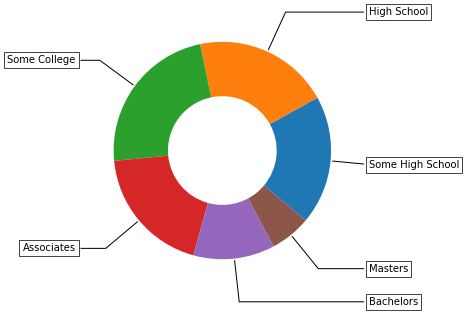

In [56]:
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

ed_group =['Some High School', 'High School', 'Some College', 'Associates', 'Bachelors', 'Masters']

ed_per_pop = [p_shs_perc, p_hs_perc, p_sc_perc, p_a_perc, p_b_perc, p_m_perc]

wedges, texts = ax.pie(ed_per_pop, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(ed_group[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

#ax.set_title("Parental Education - Perencentage of Population")
plt.savefig('images/per_pop_ed.png')
plt.show()

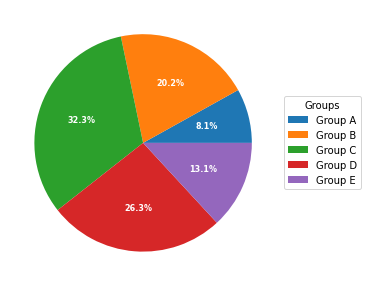

In [57]:
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))


eth_group =['Group A', 'Group B', 'Group C', 'Group D', 'Group E']
eth_per_pop = [group_a_perc, group_b_perc, group_c_perc, group_d_perc,group_e_perc]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)



wedges, texts, autotexts = ax.pie(eth_per_pop, autopct=lambda pct: func(pct, eth_per_pop),
                                  textprops=dict(color="w"))

ax.legend(wedges, eth_group,
          title="Groups",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

#ax.set_title("Ethnicity - Perencentage of Population")
plt.savefig('images/per_pop_eth.png')
plt.show()

In [28]:
pass_rates_ploe = pass_rates_ploe.set_index('Group - % Passing')
pass_rates_ploe = pass_rates_ploe.drop(columns=['Count', '% of Pop'])
pass_rates_ploe

,Math,Reading,Writing,Overall
Group - % Passing,,,,
Masters,69.0,77.0,80.0,75.0
Bachelors,63.0,71.0,70.0,70.0
Associates,62.0,71.0,68.0,68.0
Some College,57.0,65.0,64.0,63.0
High School,50.0,59.0,53.0,55.0
Some High School,46.0,54.0,48.0,50.0


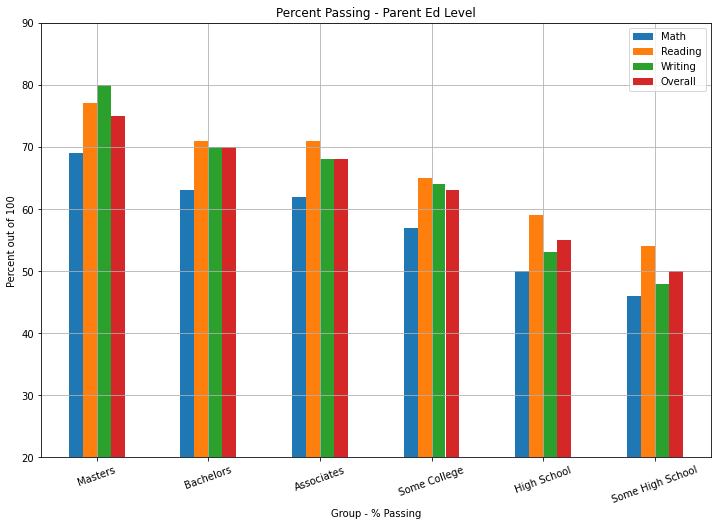

In [62]:
ax = pass_rates_ploe.plot(kind='bar', figsize=(12,8))
ax.set_alpha(0.8)
ax.set_ylim(20, 90)
ax.set_title("Percent Passing - Parent Ed Level")
ax.set_ylabel('Percent out of 100')
plt.xticks(rotation=20)
plt.grid()
plt.savefig('images/pass_rate_ed.png')
plt.show()

In [30]:
pass_rates_ethnicity
pass_rates_ethnicity = pass_rates_ethnicity.set_index('Group - % Passing')
pass_rates_ethnicity = pass_rates_ethnicity.drop(columns=['Count', '% of Pop'])
pass_rates_ethnicity

,Math,Reading,Writing,Overall
Group - % Passing,,,,
Group E,76.0,73.0,72.0,75.0
Group D,61.0,69.0,68.0,67.0
Group C,51.0,63.0,59.0,58.0
Group A,48.0,60.0,53.0,55.0
Group B,47.0,58.0,54.0,53.0


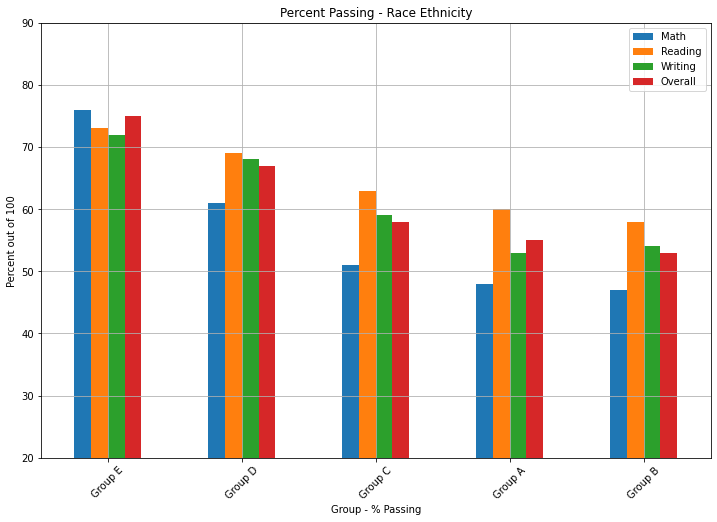

In [63]:
ax = pass_rates_ethnicity.plot(kind='bar', figsize=(12,8))
ax.set_alpha(0.8)
ax.set_ylim(20, 90)
ax.set_title("Percent Passing - Race Ethnicity")
ax.set_ylabel('Percent out of 100')
plt.xticks(rotation=45)
plt.grid()
plt.savefig('images/pass_rate_eth.png')
plt.show()

Here we can see some pretty expected results. The highest percent passing with respect to partental level of education are children of parents who hold a masters degree. Remarkably though, it seems like children with parents who haven't finished high shool are still showing a 50% passing rate and are still passing over half of that group in reading at 54%.

Ethnicity shows a pretty pronounced achievement gap between Group E being the highest achievers and Group B bringing up the rear. Likely this has to do with financial and parental support. None the less, even in the most disadvantaged group, almost 60% of students are still passing.

## Lunch
This is an indicator of poverty. This section focuses on the effect of poverty through examining the differences between performance in children who recieve free or subsidized lunch and children who's families pay for lunch. As the data will show, that difference in achievement is evident. Poverty is devastating to children's education. 

In [32]:
#std_lunch
#rdc_lunch
rdc_l_means_ed = rdc_lunch.groupby(['parental level of education']).mean().round(decimals=2).sort_values(by='composite score', ascending=False)
rdc_l_means_ed = rdc_l_means_ed.rename(columns={"math score":"RDC Math Score","reading score":"RDC Reading Score","writing score":"RDC Writing Score","composite score":"RDC Composite"})

std_l_means_ed = std_lunch.groupby(['parental level of education']).mean().round(decimals=2).sort_values(by='composite score', ascending=False)
std_l_means_ed = std_l_means_ed.rename(columns={"math score":"STD Math Score","reading score":"STD Reading Score","writing score":"STD Writing Score","composite score":"STD Composite"})

lunch_means_ed = pd.merge(rdc_l_means_ed, std_l_means_ed, how="left", on=["parental level of education"])
lunch_means_ed = lunch_means_ed[["RDC Math Score", "STD Math Score", "RDC Reading Score", "STD Reading Score", "RDC Writing Score", "STD Writing Score", "RDC Composite", "STD Composite"]]
lunch_means_ed

,RDC Math Score,STD Math Score,RDC Reading Score,STD Reading Score,RDC Writing Score,STD Writing Score,RDC Composite,STD Composite
parental level of education,,,,,,,,
master's degree,65.44,76.10,72.11,77.99,71.48,78.72,69.65,77.62
bachelor's degree,62.33,73.66,68.55,75.18,67.80,75.64,66.23,74.83
associate's degree,60.91,72.97,66.85,74.47,65.11,73.94,64.30,73.79
some college,58.76,70.86,64.67,72.53,63.39,72.07,62.29,71.82
high school,56.61,68.48,62.33,70.36,59.74,68.61,59.58,69.15
some high school,54.74,67.21,60.02,69.18,57.37,67.56,57.36,67.98


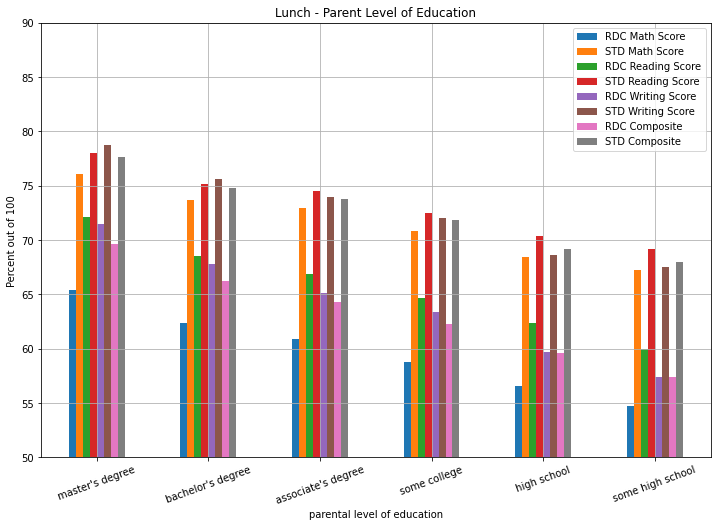

In [47]:
ax = lunch_means_ed.plot(kind='bar', figsize=(12,8))
ax.set_alpha(0.8)
ax.set_ylim(50, 90)
ax.set_title("Lunch - Parent Level of Education")
ax.set_ylabel('Percent out of 100')
plt.xticks(rotation=20)
plt.grid()
plt.savefig('images/lunch_ed.png')
plt.show()

In [34]:
rdc_l_means_eth = rdc_lunch.groupby(['race/ethnicity']).mean().round(decimals=2).sort_values(by='composite score', ascending=False)
rdc_l_means_eth = rdc_l_means_eth.rename(columns={"math score":"RDC Math Score","reading score":"RDC Reading Score","writing score":"RDC Writing Score","composite score":"RDC Composite"})

std_l_means_eth = std_lunch.groupby(['race/ethnicity']).mean().round(decimals=2).sort_values(by='composite score', ascending=False)
std_l_means_eth = std_l_means_eth.rename(columns={"math score":"STD Math Score","reading score":"STD Reading Score","writing score":"STD Writing Score","composite score":"STD Composite"})

lunch_means_eth = pd.merge(rdc_l_means_eth, std_l_means_eth, how="left", on=['race/ethnicity'])
lunch_means_eth = lunch_means_eth[["RDC Math Score", "STD Math Score", "RDC Reading Score", "STD Reading Score", "RDC Writing Score", "STD Writing Score", "RDC Composite", "STD Composite"]]
lunch_means_eth

,RDC Math Score,STD Math Score,RDC Reading Score,STD Reading Score,RDC Writing Score,STD Writing Score,RDC Composite,STD Composite
race/ethnicity,,,,,,,,
group E,67.22,79.02,69.50,76.70,67.24,75.17,67.99,76.95
group D,59.85,72.41,65.83,73.78,65.82,74.31,63.85,73.49
group C,57.98,68.33,64.71,71.50,62.36,70.56,61.69,70.13
group A,55.93,68.22,62.41,70.93,59.80,69.46,59.34,69.55
group B,55.46,67.80,61.73,70.14,59.41,68.70,58.87,68.91


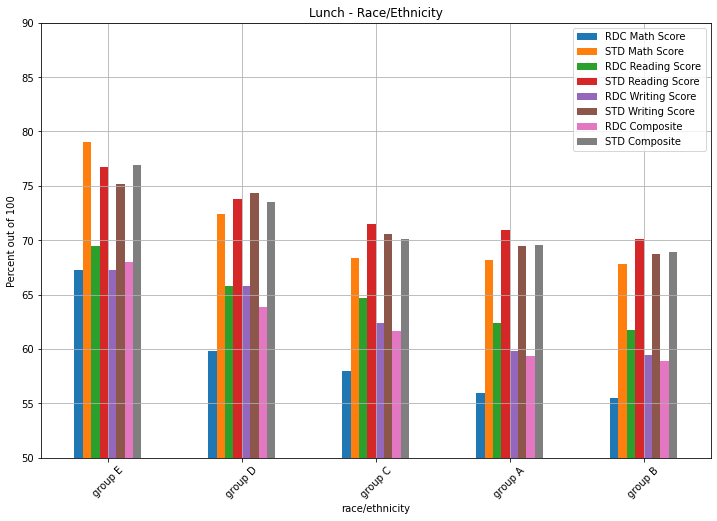

In [35]:
ax = lunch_means_eth.plot(kind='bar', figsize=(12,8))
ax.set_alpha(0.8)
ax.set_ylim(50, 90)
ax.set_title("Lunch - Race/Ethnicity")
ax.set_ylabel('Percent out of 100')
plt.xticks(rotation=45)
plt.grid()
plt.savefig('images/lunch_race_eth.png')
plt.show()

It doesn't matter the level of education. There's a huge difference in scores between children receiving reduced lunch and children recieving paid lunch. Especially in math. According to this data.

In [36]:
# Counts of each ethnic group on reduced lunch
group_a_count_l = rdc_lunch.loc[rdc_lunch['race/ethnicity'] == 'group A'].count()
group_b_count_l = rdc_lunch.loc[rdc_lunch['race/ethnicity'] == 'group B'].count()
group_c_count_l = rdc_lunch.loc[rdc_lunch['race/ethnicity'] == 'group C'].count()
group_d_count_l = rdc_lunch.loc[rdc_lunch['race/ethnicity'] == 'group D'].count()
group_e_count_l = rdc_lunch.loc[rdc_lunch['race/ethnicity'] == 'group E'].count()

group_a_perc_l = ((group_a_count_l['race/ethnicity'] / group_a_count).round(decimals=2))*100
group_b_perc_l = ((group_b_count_l['race/ethnicity'] / group_b_count).round(decimals=2))*100
group_c_perc_l = ((group_c_count_l['race/ethnicity'] / group_c_count).round(decimals=2))*100
group_d_perc_l = ((group_d_count_l['race/ethnicity'] / group_d_count).round(decimals=2))*100
group_e_perc_l = ((group_e_count_l['race/ethnicity'] / group_e_count).round(decimals=2))*100

# Counts of each parent education level on reduced lunch
p_shs_count_l = rdc_lunch.loc[stu_data['parental level of education'] == 'some high school'].count()
p_hs_count_l = rdc_lunch.loc[stu_data['parental level of education'] == 'high school'].count()
p_sc_count_l = rdc_lunch.loc[stu_data['parental level of education'] == 'some college'].count()
p_a_count_l = rdc_lunch.loc[stu_data['parental level of education'] == "associate's degree"].count()
p_b_count_l = rdc_lunch.loc[stu_data['parental level of education'] == "bachelor's degree"].count()
p_m_count_l = rdc_lunch.loc[stu_data['parental level of education'] == "master's degree"].count()

p_shs_perc_l = ((p_shs_count_l['parental level of education']/p_shs_count).round(decimals=2))*100
p_hs_perc_l = ((p_hs_count_l['parental level of education']/p_hs_count).round(decimals=2))*100
p_sc_perc_l = ((p_sc_count_l['parental level of education']/p_sc_count).round(decimals=2))*100
p_a_perc_l = ((p_a_count_l['parental level of education']/p_a_count).round(decimals=2))*100
p_b_perc_l = ((p_b_count_l['parental level of education']/p_b_count).round(decimals=2))*100
p_m_perc_l = ((p_m_count_l['parental level of education']/p_m_count).round(decimals=2))*100

In [37]:
eth_group_l =['Group A', 'Group B', 'Group C', 'Group D', 'Group E']
eth_group_count_l = [group_a_count_l['lunch'], group_b_count_l['lunch'], group_c_count_l['lunch'], group_d_count_l['lunch'], group_e_count_l['lunch']]
per_pop = [group_a_perc_l['lunch'], group_b_perc_l['lunch'], group_c_perc_l['lunch'], group_d_perc_l['lunch'],group_e_perc_l['lunch']]


red_l_ethnicity = pd.DataFrame({'Group - % Reduced Lunch':eth_group_l,'Count':eth_group_count_l, 'Percentage':per_pop})
red_l_ethnicity = red_l_ethnicity.sort_values(by='Percentage', ascending=False)
red_l_ethnicity

,Group - % Reduced Lunch,Count,Percentage
0,Group A,152,36.0
2,Group C,571,36.0
1,Group B,356,35.0
3,Group D,455,35.0
4,Group E,224,33.0


In [38]:
ed_group_l =['Some High School', 'High School', 'Some College', 'Associates', 'Bachelors', 'Masters']
ed_group_count_l = [p_shs_count_l['lunch'], p_hs_count_l['lunch'], p_sc_count_l['lunch'], p_a_count_l['lunch'], p_b_count_l['lunch'], p_m_count_l['lunch']]
per_pop = [p_shs_perc_l['lunch'], p_hs_perc_l['lunch'], p_sc_perc_l['lunch'], p_a_perc_l['lunch'], p_b_perc_l['lunch'], p_m_perc_l['lunch']]

red_l_ed = pd.DataFrame({'Group - % Reduced Lunch':ed_group_l,'Count':ed_group_count_l, 'Percentage':per_pop})
red_l_ed = red_l_ed.sort_values(by='Percentage', ascending=False)
red_l_ed

,Group - % Reduced Lunch,Count,Percentage
5,Masters,125,39.0
4,Bachelors,231,37.0
2,Some College,416,36.0
0,Some High School,321,34.0
1,High School,340,34.0
3,Associates,325,33.0


Regardless of education or ethnicity, according to this data, around 35% of children are receiving reduced lunch. 

## Test Prep
This examines the effect of the test prep course on scores. We will try to use the dataframes that were created above to examine the effect on test scores in various circumstances. This data shows that about 35% of students take the test. While the test prep will not bring the scores from the more disadvantaged demographics to the level of the more priviledged demographics, it really does help to at least bring the mean scores up to strongly passing levels. 

In [39]:
prep_yes = stu_data.loc[stu_data['test preparation course'] == 'completed']
prep_no = stu_data.loc[stu_data['test preparation course'] == 'none']

In [40]:
prep_y_means_eth = prep_yes.groupby('race/ethnicity').mean().round(decimals=2)
prep_y_means_eth = prep_y_means_eth.rename(columns={"math score":"yes Math Score","reading score":"yes Reading Score","writing score":"yes Writing Score","composite score":"Yes Composite"})
#prep_y_means_eth

prep_n_means_eth = prep_no.groupby('race/ethnicity').mean().round(decimals=2)
prep_n_means_eth = prep_n_means_eth.rename(columns={"math score":"no Math Score","reading score":"no Reading Score","writing score":"no Writing Score","composite score":"no Composite"})
#prep_n_means_eth

test_prep_eth = pd.merge(prep_y_means_eth, prep_n_means_eth, how="left", on=['race/ethnicity'])
test_prep_eth = test_prep_eth[["yes Math Score", "no Math Score", "yes Reading Score", "no Reading Score","yes Writing Score", "no Writing Score", "Yes Composite", "no Composite"]]
test_prep_eth



,yes Math Score,no Math Score,yes Reading Score,no Reading Score,yes Writing Score,no Writing Score,Yes Composite,no Composite
race/ethnicity,,,,,,,,
group A,68.43,61.10,72.78,65.04,72.87,62.04,71.35,62.73
group B,68.05,61.20,72.83,64.36,72.94,61.67,71.29,62.43
group C,68.06,62.60,73.57,66.47,74.01,63.94,71.90,64.33
group D,70.95,66.38,75.35,68.51,77.64,67.74,74.64,67.54
group E,78.16,73.27,77.93,72.17,77.92,69.37,78.00,71.60


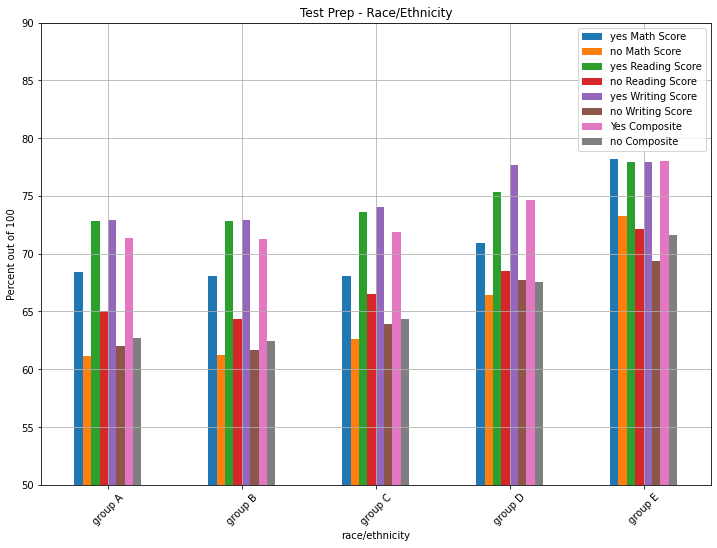

In [41]:
ax = test_prep_eth.plot(kind='bar', figsize=(12,8.5))
ax.set_alpha(0.8)
ax.set_ylim(50, 90)
ax.set_title("Test Prep - Race/Ethnicity")
ax.set_ylabel('Percent out of 100')
plt.xticks(rotation=45)
plt.grid()
plt.savefig('images/test_prep_race_eth.png')
plt.show()

In [42]:
prep_y_means_ed = prep_yes.groupby('parental level of education').mean().round(decimals=2)
prep_y_means_ed = prep_y_means_ed.rename(columns={"math score":"yes Math Score","reading score":"yes Reading Score","writing score":"yes Writing Score","composite score":"Yes Composite"})
#prep_y_means_ed

prep_n_means_ed = prep_no.groupby('parental level of education').mean().round(decimals=2)
prep_n_means_ed = prep_n_means_ed.rename(columns={"math score":"no Math Score","reading score":"no Reading Score","writing score":"no Writing Score","composite score":"no Composite"})
#prep_n_means_ed

test_prep_ed = pd.merge(prep_y_means_ed, prep_n_means_ed, how="left", on=['parental level of education'])
test_prep_ed = test_prep_ed[["yes Math Score", "no Math Score", "yes Reading Score", "no Reading Score","yes Writing Score", "no Writing Score", "Yes Composite", "no Composite"]]
test_prep_ed

,yes Math Score,no Math Score,yes Reading Score,no Reading Score,yes Writing Score,no Writing Score,Yes Composite,no Composite
parental level of education,,,,,,,,
associate's degree,72.74,66.67,76.65,69.10,77.46,67.12,75.61,67.65
bachelor's degree,72.48,67.67,77.00,70.22,78.84,69.17,76.10,69.03
high school,67.99,62.65,72.02,65.40,72.04,62.32,70.72,63.45
master's degree,74.93,69.99,80.16,72.80,82.17,71.83,79.07,71.55
some college,69.98,64.55,73.99,67.27,74.95,65.55,72.98,65.79
some high school,66.80,60.84,71.04,63.36,71.15,60.28,69.67,61.47


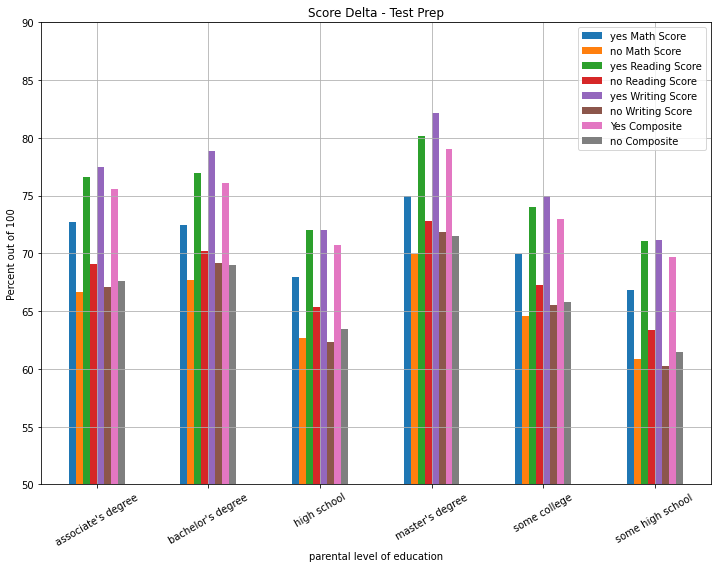

In [43]:
ax = test_prep_ed.plot(kind='bar', figsize=(12,8.5))
ax.set_alpha(0.8)
ax.set_ylim(50, 90)
ax.set_title("Score Delta - Test Prep")
ax.set_ylabel('Percent out of 100')
plt.xticks(rotation=30)
plt.grid()
plt.savefig('images/test_prep_ed.png')
plt.show()